In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


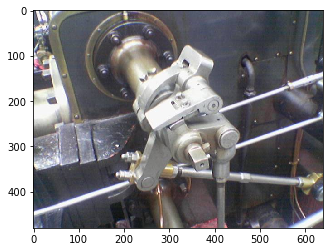

In [2]:
valve_img = Image.open('valve.png')
plt.imshow(valve_img)


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [4]:
valve_array = np.array(valve_img)
print(valve_array.shape)

def apply_filter_to_patch(filter, patch):
    assert filter.shape == patch.shape
    return np.sum(filter * patch)

def convolve(img, filter):
    assert filter.shape[0] % 2 == 1
    assert filter.shape[1] % 2 == 1
    assert filter.shape[0] == filter.shape[1]
    
    num_pixels_lost = (filter.shape[0] - 1)

    result = np.zeros((
        img.shape[0] - num_pixels_lost,
        img.shape[1] - num_pixels_lost,
        1
    ))

    for y_idx in range(num_pixels_lost // 2, img.shape[0] - num_pixels_lost // 2):
        print(f'y_idx: {y_idx}')
        for x_idx in range(num_pixels_lost // 2, img.shape[1] - num_pixels_lost // 2):
            for channel_idx in range(0, img.shape[2]):
                y_start = y_idx - (num_pixels_lost // 2)
                y_end = y_idx + (num_pixels_lost // 2)
                
                x_start = x_idx - (num_pixels_lost // 2)
                x_end = x_idx + (num_pixels_lost // 2)

                patch = img[y_start:(y_end + 1), x_start:(x_end + 1), channel_idx]
                result[y_start, x_start, 0] += apply_filter_to_patch(filter, patch)
                
    return result

convolved_img = convolve(
    valve_array,
    np.array([
        [-1, 0, +1],
        [-2, 0, +2],
        [-1, 0, +1],
    ])
)


(480, 640, 3)
y_idx: 1
y_idx: 2
y_idx: 3
y_idx: 4
y_idx: 5
y_idx: 6
y_idx: 7
y_idx: 8
y_idx: 9
y_idx: 10
y_idx: 11
y_idx: 12
y_idx: 13
y_idx: 14
y_idx: 15
y_idx: 16
y_idx: 17
y_idx: 18
y_idx: 19
y_idx: 20
y_idx: 21
y_idx: 22
y_idx: 23
y_idx: 24
y_idx: 25
y_idx: 26
y_idx: 27
y_idx: 28
y_idx: 29
y_idx: 30
y_idx: 31
y_idx: 32
y_idx: 33
y_idx: 34
y_idx: 35
y_idx: 36
y_idx: 37
y_idx: 38
y_idx: 39
y_idx: 40
y_idx: 41
y_idx: 42
y_idx: 43
y_idx: 44
y_idx: 45
y_idx: 46
y_idx: 47
y_idx: 48
y_idx: 49
y_idx: 50
y_idx: 51
y_idx: 52
y_idx: 53
y_idx: 54
y_idx: 55
y_idx: 56
y_idx: 57
y_idx: 58
y_idx: 59
y_idx: 60
y_idx: 61
y_idx: 62
y_idx: 63
y_idx: 64
y_idx: 65
y_idx: 66
y_idx: 67
y_idx: 68
y_idx: 69
y_idx: 70
y_idx: 71
y_idx: 72
y_idx: 73
y_idx: 74
y_idx: 75
y_idx: 76
y_idx: 77
y_idx: 78
y_idx: 79
y_idx: 80
y_idx: 81
y_idx: 82
y_idx: 83
y_idx: 84
y_idx: 85
y_idx: 86
y_idx: 87
y_idx: 88
y_idx: 89
y_idx: 90
y_idx: 91
y_idx: 92
y_idx: 93
y_idx: 94
y_idx: 95
y_idx: 96
y_idx: 97
y_idx: 98
y_idx: 99
y_idx

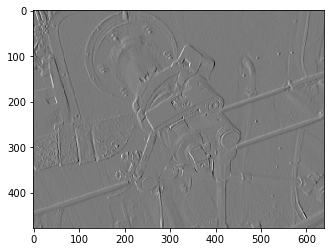

In [5]:
def normalize_img(img):
    return 255 * (img + np.min(img)) / (np.min(img) + np.max(img))

normalized_convolved_img = normalize_img(convolved_img)
plt.imshow(normalized_convolved_img[:, :, 0], cmap='gray')

In [6]:
convolved_img2 = convolve(
    valve_array,
    np.array([
        [-1, -2, -1],
        [0,   0,  0],
        [+1, +2, +1],
    ])
)


y_idx: 1
y_idx: 2
y_idx: 3
y_idx: 4
y_idx: 5
y_idx: 6
y_idx: 7
y_idx: 8
y_idx: 9
y_idx: 10
y_idx: 11
y_idx: 12
y_idx: 13
y_idx: 14
y_idx: 15
y_idx: 16
y_idx: 17
y_idx: 18
y_idx: 19
y_idx: 20
y_idx: 21
y_idx: 22
y_idx: 23
y_idx: 24
y_idx: 25
y_idx: 26
y_idx: 27
y_idx: 28
y_idx: 29
y_idx: 30
y_idx: 31
y_idx: 32
y_idx: 33
y_idx: 34
y_idx: 35
y_idx: 36
y_idx: 37
y_idx: 38
y_idx: 39
y_idx: 40
y_idx: 41
y_idx: 42
y_idx: 43
y_idx: 44
y_idx: 45
y_idx: 46
y_idx: 47
y_idx: 48
y_idx: 49
y_idx: 50
y_idx: 51
y_idx: 52
y_idx: 53
y_idx: 54
y_idx: 55
y_idx: 56
y_idx: 57
y_idx: 58
y_idx: 59
y_idx: 60
y_idx: 61
y_idx: 62
y_idx: 63
y_idx: 64
y_idx: 65
y_idx: 66
y_idx: 67
y_idx: 68
y_idx: 69
y_idx: 70
y_idx: 71
y_idx: 72
y_idx: 73
y_idx: 74
y_idx: 75
y_idx: 76
y_idx: 77
y_idx: 78
y_idx: 79
y_idx: 80
y_idx: 81
y_idx: 82
y_idx: 83
y_idx: 84
y_idx: 85
y_idx: 86
y_idx: 87
y_idx: 88
y_idx: 89
y_idx: 90
y_idx: 91
y_idx: 92
y_idx: 93
y_idx: 94
y_idx: 95
y_idx: 96
y_idx: 97
y_idx: 98
y_idx: 99
y_idx: 100
y_idx: 1

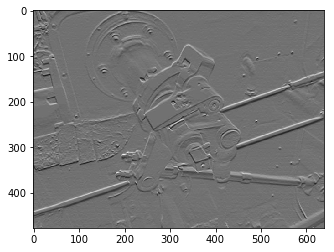

In [7]:
normalized_convolved_img2 = normalize_img(convolved_img2)
plt.imshow(normalized_convolved_img2[:, :, 0], cmap='gray')

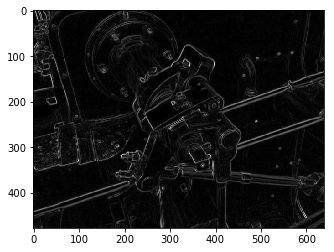

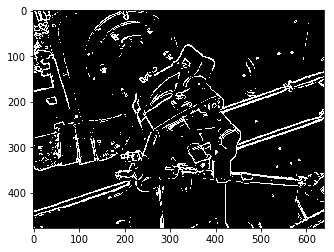

In [8]:
both = normalize_img(np.sqrt(convolved_img ** 2 + convolved_img2 ** 2))
both_bw = (both > 40) * np.ones_like(both)
plt.imshow(both[:, :, 0], cmap='gray')
plt.figure()
plt.imshow(both_bw[:, :, 0], cmap='gray')

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train / 255.0
# x_train = np.transpose(x_train, (0, 2, 3, 1))
x_test = x_test / 255.0
# x_test = np.transpose(x_test, (0, 2, 3, 1))

y_train = to_categorical(y_train[:, 0], 10)
y_test = to_categorical(y_test[:, 0], 10)


In [ ]:
plt.imshow(x_train[0])
plt.figure()
plt.imshow(x_train[1])
plt.figure()
plt.imshow(x_train[2])


In [13]:

from keras.layers import Dense, Flatten, Input
from keras.models import Model
from keras.optimizers import SGD

input_tensor = Input(shape = (32, 32, 3))
flattened_input_tensor = Flatten()(input_tensor)
class_guesses = Dense(10, activation = 'softmax')(flattened_input_tensor)

model = Model(input_tensor, class_guesses)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(lr = 0.01),
    metrics = ['accuracy']
)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 7s 148us/step - loss: 1.9474 - acc: 0.3021 - val_loss: 1.9249 - val_acc: 0.3324


In [14]:
model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    batch_size = 32,
    epochs = 10
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 86us/step - loss: 1.8441 - acc: 0.3498 - val_loss: 1.9018 - val_acc: 0.3361
Epoch 2/10
50000/50000 [==============================] - 4s 87us/step - loss: 1.8136 - acc: 0.3645 - val_loss: 1.8688 - val_acc: 0.3440
Epoch 3/10
50000/50000 [==============================] - 4s 87us/step - loss: 1.7944 - acc: 0.3736 - val_loss: 1.7827 - val_acc: 0.3798
Epoch 4/10
50000/50000 [==============================] - 4s 87us/step - loss: 1.7841 - acc: 0.3781 - val_loss: 1.9084 - val_acc: 0.3340
Epoch 5/10
50000/50000 [==============================] - 4s 81us/step - loss: 1.7718 - acc: 0.3831 - val_loss: 1.8590 - val_acc: 0.3385
Epoch 6/10
50000/50000 [==============================] - 4s 83us/step - loss: 1.7674 - acc: 0.3816 - val_loss: 1.9037 - val_acc: 0.3440
Epoch 7/10
50000/50000 [==============================] - 5s 98us/step - loss: 1.7586 - acc: 0.3875 - val_loss: 1.9794 - val_acc

In [16]:
from keras import backend as K
K.clear_session()

from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from keras.models import Model
from keras.optimizers import SGD

input_tensor = Input(shape = (32, 32, 3))

conv1_tensor = Conv2D(
    32,
    kernel_size = (3, 3),
    strides = (1, 1),
    activation = 'relu',
)(input_tensor)
conv1_tensor = MaxPooling2D()(conv1_tensor)

conv2_tensor = Conv2D(
    64,
    kernel_size = (3, 3),
    strides = (1, 1),
    activation = 'relu',
)(conv1_tensor)
conv2_tensor = MaxPooling2D()(conv2_tensor)

flattened_tensor = Flatten()(conv2_tensor)
class_guesses = Dense(10, activation = 'softmax')(flattened_tensor)

conv_model = Model(input_tensor, class_guesses)
conv_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(lr = 0.01),
    metrics = ['accuracy']
)


In [17]:
conv_model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    batch_size = 32,
    epochs = 10
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 47s 935us/step - loss: 2.0214 - acc: 0.2704 - val_loss: 1.7607 - val_acc: 0.3774
Epoch 2/10
50000/50000 [==============================] - 45s 890us/step - loss: 1.6109 - acc: 0.4278 - val_loss: 1.5078 - val_acc: 0.4676
Epoch 3/10
50000/50000 [==============================] - 44s 870us/step - loss: 1.4604 - acc: 0.4821 - val_loss: 1.6908 - val_acc: 0.3878
Epoch 4/10
50000/50000 [==============================] - 45s 906us/step - loss: 1.3771 - acc: 0.5150 - val_loss: 1.4317 - val_acc: 0.5031
Epoch 5/10
50000/50000 [==============================] - 45s 907us/step - loss: 1.3140 - acc: 0.5409 - val_loss: 1.3053 - val_acc: 0.5386
Epoch 6/10
50000/50000 [==============================] - 42s 847us/step - loss: 1.2552 - acc: 0.5648 - val_loss: 1.3187 - val_acc: 0.5328
Epoch 7/10
50000/50000 [==============================] - 39s 789us/step - loss: 1.2026 - acc: 0.5856 - val_loss: 1.